# Import Libraries, Pollen Dataset loading with Selected feature using RgCop, Cells should be in row, Selected genes should be in coloumn.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import leidenalg
adata1=sc.read_csv('rgcopd.csv',delimiter=',', first_column_names=None, dtype='float32')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


# Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.


In [2]:
sc.tl.pca(adata1, svd_solver='arpack')

# Plot the variance ratio of pcs

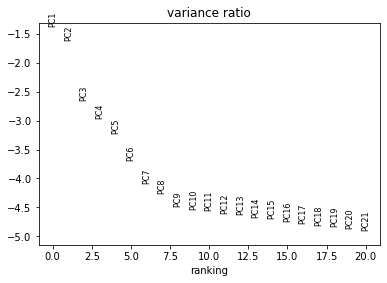

In [3]:
 
sc.pl.pca_variance_ratio(adata1,n_pcs=20,log=True,save="pc_cbmc.svg")

# Create Neighborhood Graph using 10 pcs, Dimension reduction using umap, Leiden clustering, Visualizing clusters

/export/scratch1/home/sumanta/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


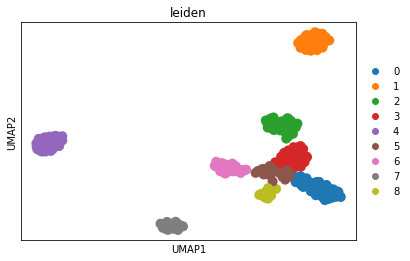

In [5]:
sc.pp.neighbors(adata1, n_neighbors=30, n_pcs=10)
sc.tl.umap(adata1)
sc.tl.leiden(adata1)
sc.pl.umap(adata1, color=['leiden'],save="umap_pollen.svg")

# Compute a ranking for the highly differential genes in each cluster

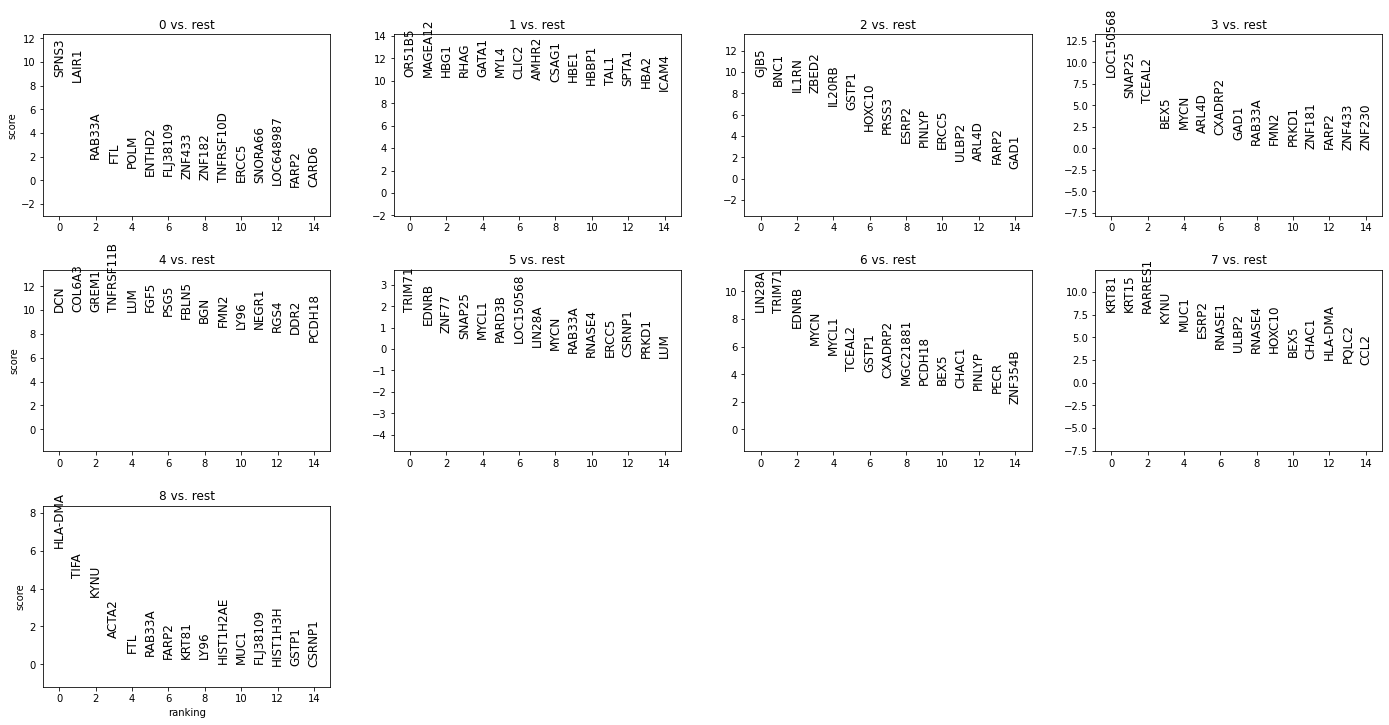

In [6]:
sc.tl.rank_genes_groups(adata1, 'leiden', method='wilcoxon',key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata1, n_genes=15, sharey=False,key="wilcoxon",fontsize=12,save="degenes_cbmc.svg")

# Top 10 DE genes for each cluster using Wilcox-Ranksum Test

In [7]:
result = adata1.uns['wilcoxon']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p,8_n,8_p
0,SPNS3,1.480606e-18,OR51B5,2.770393e-25,GJB5,9.071815e-22,LOC150568,4.801257e-17,DCN,7.146033e-23,TRIM71,0.082091,LIN28A,1.618138e-17,KRT81,5.884106e-15,HLA-DMA,6.565701e-10
1,LAIR1,1.028651e-16,MAGEA12,2.770393e-25,BNC1,2.098658e-18,SNAP25,4.382745e-09,COL6A3,7.146033e-23,EDNRB,0.262618,TRIM71,3.465937e-17,KRT15,6.253744e-15,TIFA,4.712974e-06
2,RAB33A,6.881005e-02,HBG1,2.770393e-25,IL1RN,2.636179e-16,TCEAL2,1.010333e-07,GREM1,7.291853e-23,ZNF77,0.432264,EDNRB,1.417858e-13,RARRES1,1.079294e-14,KYNU,3.616018e-04
3,FTL,1.350706e-01,RHAG,2.770393e-25,ZBED2,6.697048e-16,BEX5,1.363293e-02,TNFRSF11B,7.592385e-23,SNAP25,0.616653,MYCN,9.131705e-10,KYNU,2.861872e-11,ACTA2,1.545392e-01
4,POLM,2.738900e-01,GATA1,2.770393e-25,IL20RB,7.706626e-12,MYCN,2.122665e-02,LUM,7.747218e-23,MYCL1,0.624065,MYCL1,6.229597e-08,MUC1,1.027867e-08,FTL,5.208775e-01
5,ENTHD2,6.922995e-01,MYL4,2.770393e-25,GSTP1,8.913623e-11,ARL4D,7.628926e-02,FGF5,7.905175e-23,PARD3B,0.726286,TCEAL2,1.947256e-05,ESRP2,6.425729e-07,RAB33A,6.386364e-01
6,FLJ38109,7.070215e-01,CLIC2,3.630331e-24,HOXC10,7.885030e-06,CXADRP2,1.027599e-01,PSG5,1.161447e-21,LOC150568,0.779435,GSTP1,2.828683e-05,RNASE1,1.817791e-04,FARP2,7.527219e-01
7,ZNF433,9.193973e-01,AMHR2,4.006104e-24,PRSS3,3.038079e-05,GAD1,3.149019e-01,FBLN5,1.709597e-20,LIN28A,0.924697,CXADRP2,1.484835e-04,ULBP2,6.681312e-04,KRT81,7.561093e-01
8,ZNF182,9.517295e-01,CSAG1,4.389967e-23,ESRP2,7.466688e-04,RAB33A,6.251308e-01,BGN,5.132222e-19,MYCN,0.984173,MGC21881,1.103747e-03,RNASE4,9.941845e-04,LY96,7.776689e-01
9,TNFRSF10D,9.323172e-01,HBE1,5.219067e-23,PINLYP,2.526758e-03,FMN2,6.868103e-01,FMN2,7.519017e-18,RAB33A,0.862886,PCDH18,1.108300e-03,HOXC10,1.040438e-03,HIST1H2AE,9.561500e-01


# Save the results in a table

In [8]:
p=pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(10)
pd.DataFrame(p).to_csv("cbmc_marker.csv")

# Manually set the color of clusters as original data cell types

In [9]:
adata1.uns['leiden_colors']=["#00fe0a", "#ff0000", "#bded1b", "#794b05", "#000000", "#0000ff", "#00ffff", "#ff21d3",
"#81b7dd", "#d19d00", "#1e7309", "#fc9a07", "#625b51", "#6a09c3"]


# Visualizing top 5 DE genes for each cluster in a heatmap using wilcox results

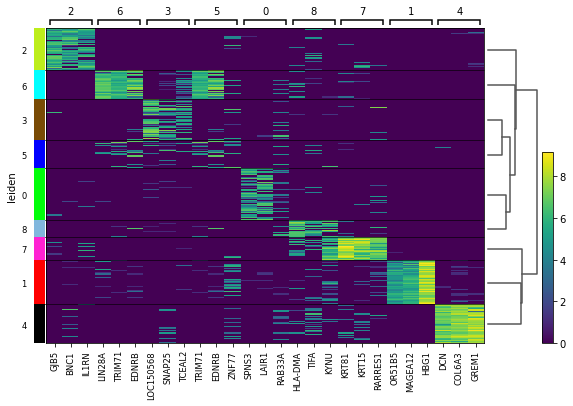

In [10]:

sc.pl.rank_genes_groups_heatmap(adata1, n_genes=3, key="wilcoxon", groupby="leiden", show_gene_labels=True, save="heatmap_cbmc.svg")

# Visualizing top 5 DE genes for each cluster in a dotplot using t-test results. Here color of dot represents mean expression of the gene in those cell, dot size represents fraction of cells expressing a gene.  

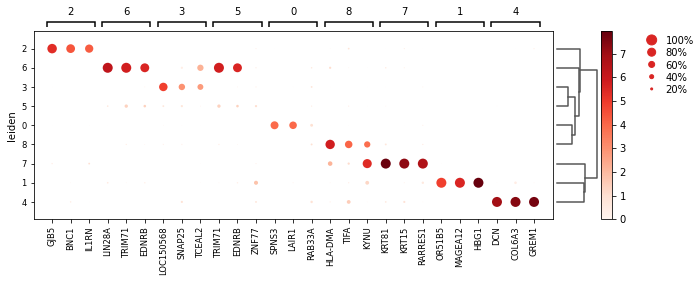

In [11]:
sc.pl.rank_genes_groups_dotplot(adata1, n_genes=3, key="wilcoxon", groupby="leiden",save="dotplot_cbmc.svg")